In [303]:
## import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [304]:
## load the dataset
df=pd.read_csv("all_month.csv")

In [305]:
##Explore the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9119 non-null   object 
 1   latitude         9119 non-null   float64
 2   longitude        9119 non-null   float64
 3   depth            9119 non-null   float64
 4   mag              9118 non-null   float64
 5   magType          9118 non-null   object 
 6   nst              6765 non-null   float64
 7   gap              6764 non-null   float64
 8   dmin             5053 non-null   float64
 9   rms              9119 non-null   float64
 10  net              9119 non-null   object 
 11  id               9119 non-null   object 
 12  updated          9119 non-null   object 
 13  place            9119 non-null   object 
 14  type             9119 non-null   object 
 15  horizontalError  6292 non-null   float64
 16  depthError       9119 non-null   float64
 17  magError      

In [306]:
##Check the first 5 rows
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-24T16:06:36.920Z,19.193001,-155.479172,30.540001,1.94,md,31.0,108.0,NaN,0.16,...,2023-01-24T16:09:54.500Z,"1 km S of Pāhala, Hawaii",earthquake,0.79,1.20,1.94,4.0,automatic,hv,hv
1,2023-01-24T15:45:49.570Z,38.818165,-122.784668,1.390000,1.07,md,16.0,89.0,0.005803,0.02,...,2023-01-24T16:11:11.079Z,"5km NNW of The Geysers, CA",earthquake,0.24,0.55,0.09,16.0,automatic,nc,nc
2,2023-01-24T15:45:18.200Z,38.839832,-122.821999,1.440000,0.55,md,10.0,93.0,0.010610,0.01,...,2023-01-24T16:11:17.079Z,"9km WNW of Cobb, CA",earthquake,0.36,1.11,0.33,11.0,automatic,nc,nc
3,2023-01-24T15:30:01.067Z,60.229500,-151.613000,60.100000,2.60,ml,NaN,NaN,NaN,0.39,...,2023-01-24T16:01:27.040Z,"12 km W of Clam Gulch, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
4,2023-01-24T15:19:03.392Z,62.254900,-151.350800,84.000000,1.50,ml,NaN,NaN,NaN,0.51,...,2023-01-24T15:21:57.429Z,"29 km N of Skwentna, Alaska",earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak


In [307]:
##Explore the content
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9119.000000,9119.000000,9119.000000,9118.000000,6765.000000,6764.000000,5053.000000,9119.000000,6292.000000,9119.000000,6692.000000,6750.000000
mean,40.163054,-115.608699,25.429822,1.654039,23.679823,118.999691,0.767914,0.290785,1.746507,2.065994,0.268471,15.680296
std,20.404816,68.823836,55.438592,1.256792,22.255361,62.617329,2.769851,0.277396,3.156703,14.959174,0.459333,21.481187
min,-65.407100,-179.973800,-3.330000,-1.120000,0.000000,14.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.403833,-153.890000,3.035000,0.880000,9.000000,70.000000,0.015410,0.090000,0.260000,0.430000,0.110000,5.000000
50%,38.824665,-122.817333,8.900000,1.420000,17.000000,105.000000,0.062300,0.170000,0.440000,0.720000,0.168000,10.000000
75%,58.224750,-116.544750,24.588500,2.100000,31.000000,157.000000,0.198300,0.470000,0.888787,1.418622,0.245000,18.000000
max,84.102700,179.944100,635.507000,7.600000,289.000000,352.540000,56.433000,2.000000,23.780000,1350.300000,5.190000,366.000000


In [308]:
## From the table above:
## latitude: Negative latitudes represent the southern hemisphere.
## longitude: Negative longitudes represent the western hemisphere.
## depth: The depth of an earthquake can be treated as negative if it is very shallow.
## mag: The magnitude of an earthquake can take a negative value if it is of a weak amplitude.
## nst: The total number of seismic stations used to determine earthquake location (it cannot = 0)
## gap: Can take a value of 0. The largest azimuthal gap between azimuthally adjacent stations (in degrees). 
       ##In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. 
       ##Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties.
## dmin: Cannot be equal to zero values in[0.4, 7.1]
##rms:The root-mean-square (RMS) travel time residual, in sec, using all weights. Typical values [0.13,1.39] so cannot equal zero.
## depthError: Typical values in km [0,100], zero is allowed.
## magError: Typical values [0,100], zero is allowed.
##magNst: The total number of seismic stations used to calculate the magnitude for this earthquake. zero is NOT allowed.
##horizontalError: Uncertainty of reported location of the event in kilometers. Typical values [0,100]


In [309]:
##Explore all the types of magnitudes recorded/used
df.groupby(['magType']).count()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
magType,,,,,,,,,,,,,,,,,,,,,
mb,769,769,769,769,769,769,769,769,769,769,...,769,769,769,769,769,769,769,769,769,769
mb_lg,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
md,2652,2652,2652,2652,2652,2652,2652,2183,2652,2652,...,2652,2652,2652,2652,2652,2608,2652,2652,2652,2652
mh,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,0,4,4,4,4
ml,5562,5562,5562,5562,5562,3209,3208,1966,5562,5562,...,5562,5562,5562,2736,5562,3206,3206,5562,5562,5562
mw,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,0,10,10,10,10
mwc,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mwr,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,18,18,29,29,29
mww,86,86,86,86,86,85,85,85,86,86,...,86,86,86,85,86,85,85,86,86,86


In [310]:
##This shows that we have some missing values
##We need to explore further as we need to consider any zeros as missing values

missing_values=(df[['time','latitude','longitude','depth','mag','magType','nst','gap','dmin','rms','net','id','updated','place','type','horizontalError','depthError','magError','magNst','status','locationSource','magSource']]==0).sum()
missing_values

time                 0
latitude             0
longitude            0
depth              139
mag                 14
magType              0
nst                  1
gap                  0
dmin                13
rms                 17
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError      0
depthError          63
magError            51
magNst               4
status               0
locationSource       0
magSource            0
dtype: int64

In [311]:
##Checking for missing values


df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2354
gap                2355
dmin               4066
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2827
depthError            0
magError           2427
magNst             2369
status                0
locationSource        0
magSource             0
dtype: int64

In [312]:
##This shows that we have some missing values
##We need to explore further as we need to consider any zeros as missing values
## mag can be 0 or negative
## Values that can't be equal to zero are: dmin, nst, rms and magNst. They will be treated as missing values.

# nan ---not a number 
## replacing zero values with Nan

df[['dmin','rms','nst','magNst']]=df[['dmin','rms','nst','magNst']].replace({0:np.nan})

In [313]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2355
gap                2355
dmin               4079
rms                  17
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2827
depthError            0
magError           2427
magNst             2373
status                0
locationSource        0
magSource             0
dtype: int64

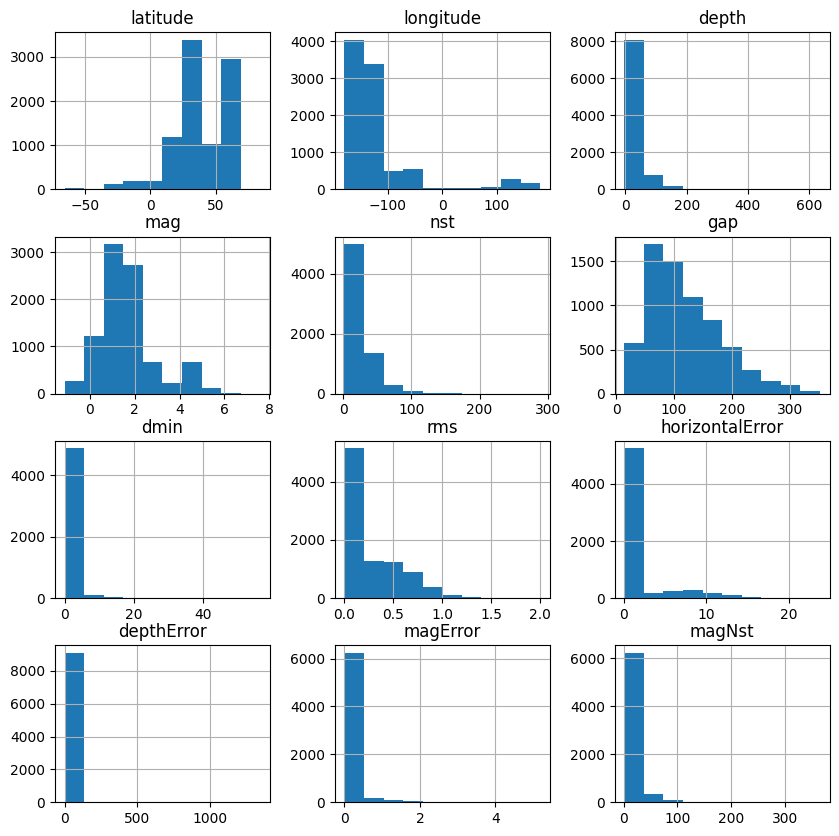

In [314]:
## plot an histogram
df.hist(bins= 10, figsize=(10,10))
plt.show()
## histogram can be skewed -- positively skewed, goes towards the right positively skewed
## mean is not affected by outliers, median is affected well b y outliers

In [315]:
## Fields with missing values: mag, (magType is not numerical), rms, nst, gap, dmin, horizontalError, magError, magNst.
## Decision on whether to use the mean or the median to replace those missing values.
## Use the mean for symmerical data distribution.
## Use the median for skewed data distribution.
## Decision: from the histograms above, all the distributions seem skewed; therefore the missing values will be replaced by the median.



In [316]:
df['mag'] = df['mag'].fillna(df['mag'].median())
df['nst'] = df['nst'].fillna(df['nst'].median())
df['gap'] = df['gap'].fillna(df['gap'].median())
df['dmin'] = df['dmin'].fillna(df['dmin'].median())
df['horizontalError'] = df['horizontalError'].fillna(df['horizontalError'].median())
df['magError'] = df['magError'].fillna(df['magError'].median())
df['magNst'] = df['magNst'].fillna(df['magNst'].median())
df['rms'] = df['rms'].fillna(df['rms'].median())

In [317]:
##Updated dataset after replacing the missing values.

In [318]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000
mean,40.163054,-115.608699,25.429822,1.654014,21.957342,115.384243,0.453490,0.291102,1.341474,2.065994,0.241731,14.209014
std,20.404816,68.823836,55.438592,1.256725,19.388775,54.275028,2.091346,0.277160,2.690799,14.959174,0.395978,18.646077
min,-65.407100,-179.973800,-3.330000,-1.120000,2.000000,14.000000,0.000128,0.000200,0.070000,0.000000,0.000000,1.000000
25%,33.403833,-153.890000,3.035000,0.880000,11.000000,82.000000,0.052195,0.090000,0.310000,0.430000,0.131000,7.000000
50%,38.824665,-122.817333,8.900000,1.420000,17.000000,105.000000,0.062540,0.170000,0.440000,0.720000,0.168000,10.000000
75%,58.224750,-116.544750,24.588500,2.100000,25.000000,137.000000,0.072590,0.470000,0.620000,1.418622,0.209805,14.000000
max,84.102700,179.944100,635.507000,7.600000,289.000000,352.540000,56.433000,2.000000,23.780000,1350.300000,5.190000,366.000000


In [319]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            1
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [320]:
## From the search above we have no missing values except 1 value for magType (non-numerical).
## We have the option to delete this row or replace it 

print(df[df['magType'].isnull()]['place'])





6666    9km NW of Pinnacles, CA
Name: place, dtype: object


In [321]:
## Look for the mode of magType used/related to this location 'place' 
print(df[df['place']=='9km NW of Pinnacles, CA']['magType'])

1216     md
3756     md
6342     md
6526     md
6662     md
6665     mw
6666    NaN
6671     ml
Name: magType, dtype: object


In [322]:
## Replace the magType missing value with 'md'.

df['magType']=df['magType'].replace(np.nan,'md')

In [323]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [324]:
##New dataset after replacing all the missing values.

df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000,9119.000000
mean,40.163054,-115.608699,25.429822,1.654014,21.957342,115.384243,0.453490,0.291102,1.341474,2.065994,0.241731,14.209014
std,20.404816,68.823836,55.438592,1.256725,19.388775,54.275028,2.091346,0.277160,2.690799,14.959174,0.395978,18.646077
min,-65.407100,-179.973800,-3.330000,-1.120000,2.000000,14.000000,0.000128,0.000200,0.070000,0.000000,0.000000,1.000000
25%,33.403833,-153.890000,3.035000,0.880000,11.000000,82.000000,0.052195,0.090000,0.310000,0.430000,0.131000,7.000000
50%,38.824665,-122.817333,8.900000,1.420000,17.000000,105.000000,0.062540,0.170000,0.440000,0.720000,0.168000,10.000000
75%,58.224750,-116.544750,24.588500,2.100000,25.000000,137.000000,0.072590,0.470000,0.620000,1.418622,0.209805,14.000000
max,84.102700,179.944100,635.507000,7.600000,289.000000,352.540000,56.433000,2.000000,23.780000,1350.300000,5.190000,366.000000


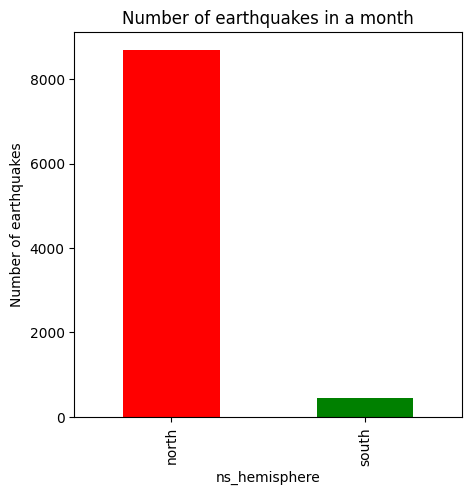

In [325]:
## Bar chart to compare seismic activities recorded between northern and southern hemisphere
import matplotlib.pyplot as plt


dflt=df

dflt.loc[dflt['latitude'] > 0, 'ns_hemisphere'] = 'north'
dflt.loc[dflt['latitude'] <= 0, 'ns_hemisphere'] = 'south'





plt.figure(figsize=(5,5))

dflt['ns_hemisphere'].value_counts().plot(kind='bar', color = ['red', 'green'])
plt.xlabel('ns_hemisphere')
plt.ylabel('Number of earthquakes')
plt.title('Number of earthquakes in a month')
plt.show()









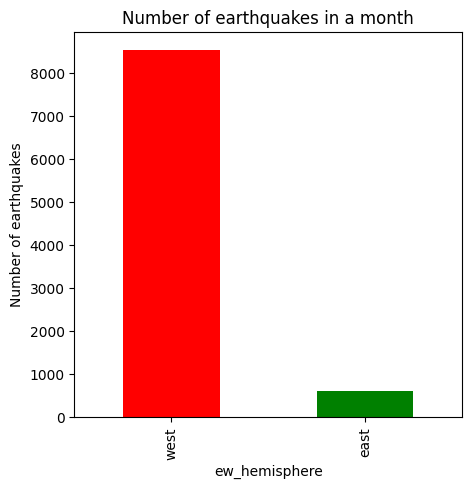

In [326]:
## Bar chart to compare seismic activities recorded between western and eastern hemisphere
import matplotlib.pyplot as plt

dflt

dflt.loc[dflt['longitude'] > 0, 'ew_hemisphere'] = 'east'
dflt.loc[dflt['longitude'] <= 0, 'ew_hemisphere'] = 'west'





plt.figure(figsize=(5,5))

dflt['ew_hemisphere'].value_counts().plot(kind='bar', color = ['red', 'green'])
plt.xlabel('ew_hemisphere')
plt.ylabel('Number of earthquakes')
plt.title('Number of earthquakes in a month')
plt.show()

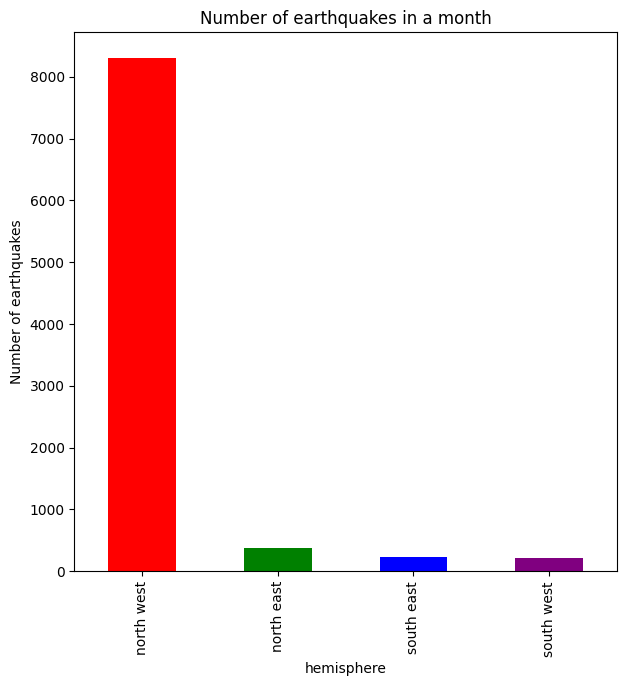

In [327]:
## Bar chart to compare seismic activities recorded between northern, southern, western and eastern hemisphere
import matplotlib.pyplot as plt


dflt

dflt.loc[(dflt['longitude'] > 0)&(dflt['latitude'] > 0), 'hemisphere'] = 'north east'
dflt.loc[(dflt['longitude'] <= 0)&(dflt['latitude'] > 0), 'hemisphere'] = 'north west'
dflt.loc[(dflt['longitude'] > 0)&(dflt['latitude'] <= 0), 'hemisphere'] = 'south east'
dflt.loc[(dflt['longitude'] <= 0)&(dflt['latitude'] <= 0), 'hemisphere'] = 'south west'





plt.figure(figsize=(7,7))

dflt['hemisphere'].value_counts().plot(kind='bar', color = ['red', 'green','blue', 'purple'])
plt.xlabel('hemisphere')
plt.ylabel('Number of earthquakes')
plt.title('Number of earthquakes in a month')
plt.show()

In [328]:
## plot correlation matrix of the twelve numerical variables
corr_mat = df.corr()
corr_mat

C:\Users\cmedj\AppData\Local\Temp\ipykernel_6944\1887517279.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
latitude,1.000000,-0.540635,-0.200351,-0.571387,-0.356010,0.012171,-0.414750,0.043301,-0.564564,-0.046350,-0.123892,-0.250435
longitude,-0.540635,1.000000,0.169548,0.632732,0.360450,-0.047596,0.364383,0.251405,0.660002,0.054021,-0.142083,0.315287
depth,-0.200351,0.169548,1.000000,0.400573,0.193528,-0.056877,0.156206,0.323205,0.455553,0.048014,-0.024833,0.209956
mag,-0.571387,0.632732,0.400573,1.000000,0.539973,-0.053223,0.441658,0.533479,0.720912,0.063932,-0.015864,0.441907
nst,-0.356010,0.360450,0.193528,0.539973,1.000000,-0.367834,0.229366,0.225245,0.333149,0.004317,0.061250,0.617731
gap,0.012171,-0.047596,-0.056877,-0.053223,-0.367834,1.000000,-0.029067,-0.083257,0.064757,0.054919,0.108060,-0.243670
dmin,-0.414750,0.364383,0.156206,0.441658,0.229366,-0.029067,1.000000,0.246181,0.612247,0.028563,-0.058237,0.235478
rms,0.043301,0.251405,0.323205,0.533479,0.225245,-0.083257,0.246181,1.000000,0.435904,0.036035,-0.130864,0.215174
horizontalError,-0.564564,0.660002,0.455553,0.720912,0.333149,0.064757,0.612247,0.435904,1.000000,0.083080,-0.088763,0.350574
depthError,-0.046350,0.054021,0.048014,0.063932,0.004317,0.054919,0.028563,0.036035,0.083080,1.000000,-0.016495,0.019174


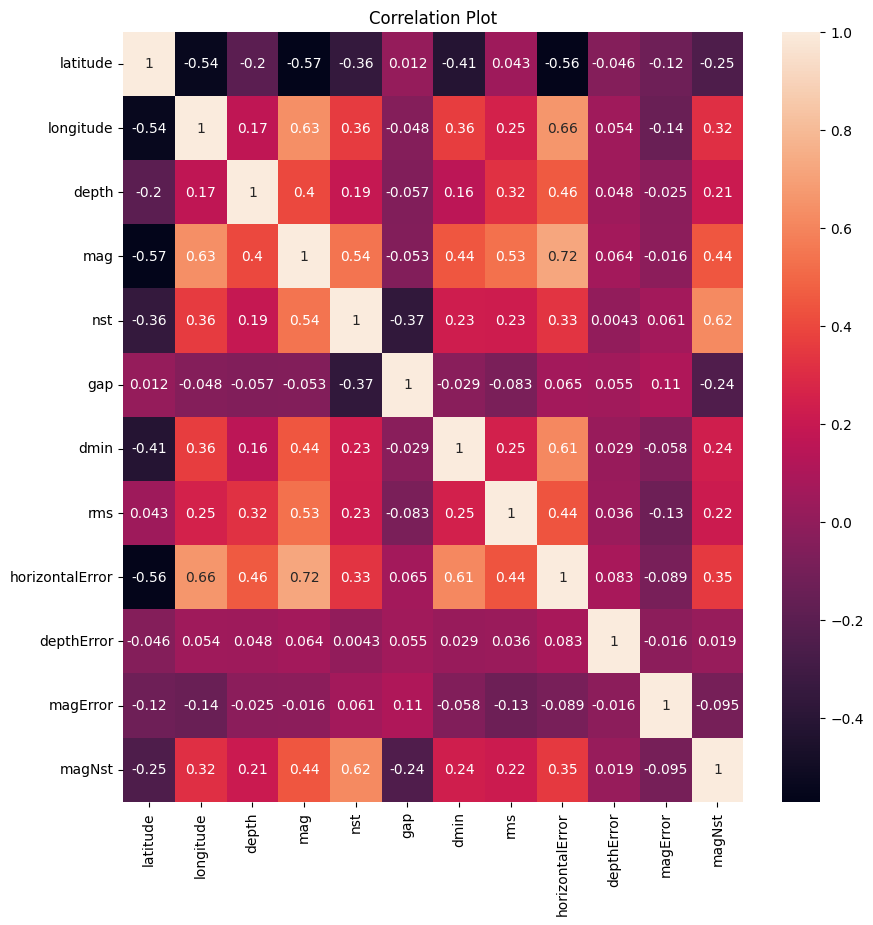

In [329]:
## heatmap of the twelve numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Plot')
plt.show()

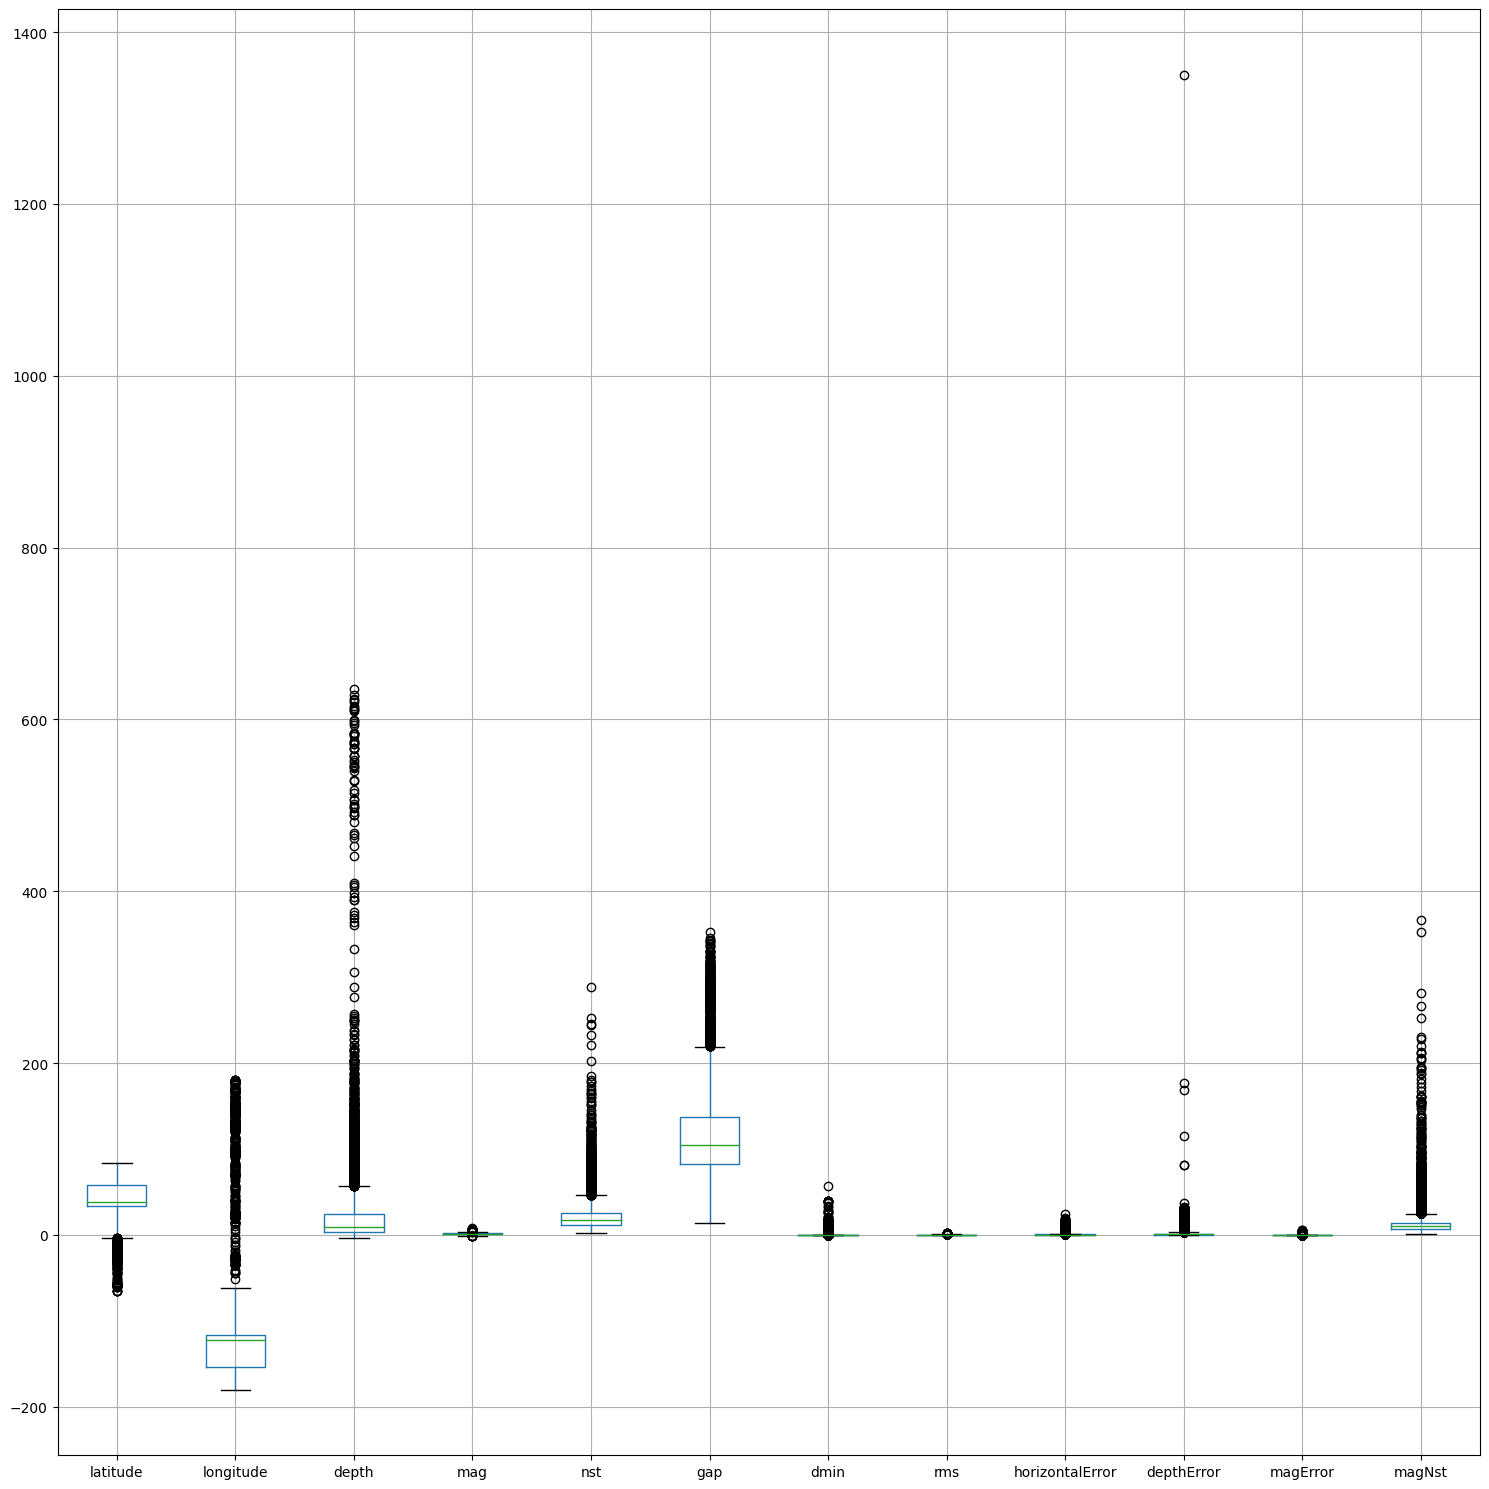

In [330]:
## Check for outliers

df.boxplot(figsize=(15,15))

plt.tight_layout()
plt.show()

In [331]:
## Removing outliers

df_new=df



In [332]:
## depth column

q1=df['depth'].quantile(0.25)
q3=df['depth'].quantile(0.75)
iqr=q3-q1
min_out=q1-(1.5 * iqr)
max_out=q3 + (1.5 * iqr)

df_new=df[(df.depth >min_out)&(df.depth<max_out)]






In [333]:
##nst column

q1=df['nst'].quantile(0.25)
q3=df['nst'].quantile(0.75)
iqr=q3-q1
min_out=q1-(1.5 * iqr)
max_out=q3 + (1.5 * iqr)

df_new=df[(df.nst >min_out)&(df.nst<max_out)]



In [334]:

## gap column

q1=df['gap'].quantile(0.25)
q3=df['gap'].quantile(0.75)
iqr=q3-q1
min_out=q1-(1.5 * iqr)
max_out=q3 + (1.5 * iqr)

df_new=df[(df.gap >min_out)&(df.gap<max_out)]

In [335]:
## depthError column

q1=df['depthError'].quantile(0.25)
q3=df['depthError'].quantile(0.75)
iqr=q3-q1
min_out=q1-(1.5 * iqr)
max_out=q3 + (1.5 * iqr)

df_new=df[(df.depthError >min_out)&(df.depthError<max_out)]

In [336]:
## magNst column

q1=df['magNst'].quantile(0.25)
q3=df['magNst'].quantile(0.75)
iqr=q3-q1
min_out=q1-(1.5 * iqr)
max_out=q3 + (1.5 * iqr)

df_new=df[(df.magNst >min_out)&(df.magNst<max_out)]

In [337]:
## dmin column

q1=df['dmin'].quantile(0.25)
q3=df['dmin'].quantile(0.75)
iqr=q3-q1
min_out=q1-(1.5 * iqr)
max_out=q3 + (1.5 * iqr)

df_new=df[(df.dmin >min_out)&(df.dmin<max_out)]

In [338]:
## horizontalError column

q1=df['horizontalError'].quantile(0.25)
q3=df['horizontalError'].quantile(0.75)
iqr=q3-q1
min_out=q1-(1.5 * iqr)
max_out=q3 + (1.5 * iqr)

df_new=df[(df.horizontalError >min_out)&(df.horizontalError<max_out)]

In [339]:
## longitude column

q1=df['longitude'].quantile(0.25)
q3=df['longitude'].quantile(0.75)
iqr=q3-q1
min_out=q1-(1.5 * iqr)
max_out=q3 + (1.5 * iqr)

df_new=df[(df.longitude >min_out)&(df.longitude<max_out)]

In [340]:
## latitude column

q1=df['latitude'].quantile(0.25)
q3=df['latitude'].quantile(0.75)
iqr=q3-q1
min_out=q1-(1.5 * iqr)
max_out=q3 + (1.5 * iqr)

df_new=df[(df.latitude >min_out)&(df.latitude<max_out)]

In [341]:
##mag column: I have opted not to include a filter for the magnitude when removing outliers. Originally the max magnitude = 7.6 but after the removal of outliers the max magnitude=3.93

#q1=df['mag'].quantile(0.25)
#q3=df['mag'].quantile(0.75)
#iqr=q3-q1
#min_out=q1-(1.5 * iqr)
#max_out=q3 + (1.5 * iqr)

#df_new=df[(df.mag >min_out)&(df.mag<max_out)]

In [342]:
df_new.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000
mean,42.937750,-121.042514,20.531843,1.519107,21.038387,116.424190,0.247964,0.272839,0.988920,1.912490,0.246832,13.386158
std,15.687463,58.926823,34.485981,1.103795,18.072460,54.625813,1.008191,0.264628,2.042152,15.253432,0.403796,16.534369
min,-3.810500,-179.973800,-3.330000,-1.120000,2.000000,14.000000,0.000128,0.000200,0.070000,0.000000,0.000000,1.000000
25%,33.927917,-154.339933,2.785000,0.840000,11.000000,83.000000,0.049005,0.080000,0.300000,0.410000,0.137000,7.000000
50%,38.831833,-122.828167,8.190000,1.400000,17.000000,105.000000,0.062540,0.160000,0.440000,0.700000,0.168000,10.000000
75%,58.245667,-116.827150,20.300000,2.000000,23.000000,138.490000,0.062540,0.430000,0.550000,1.270000,0.210546,13.000000
max,84.102700,179.841100,599.231000,7.000000,289.000000,352.540000,20.129000,2.000000,23.780000,1350.300000,5.190000,353.000000


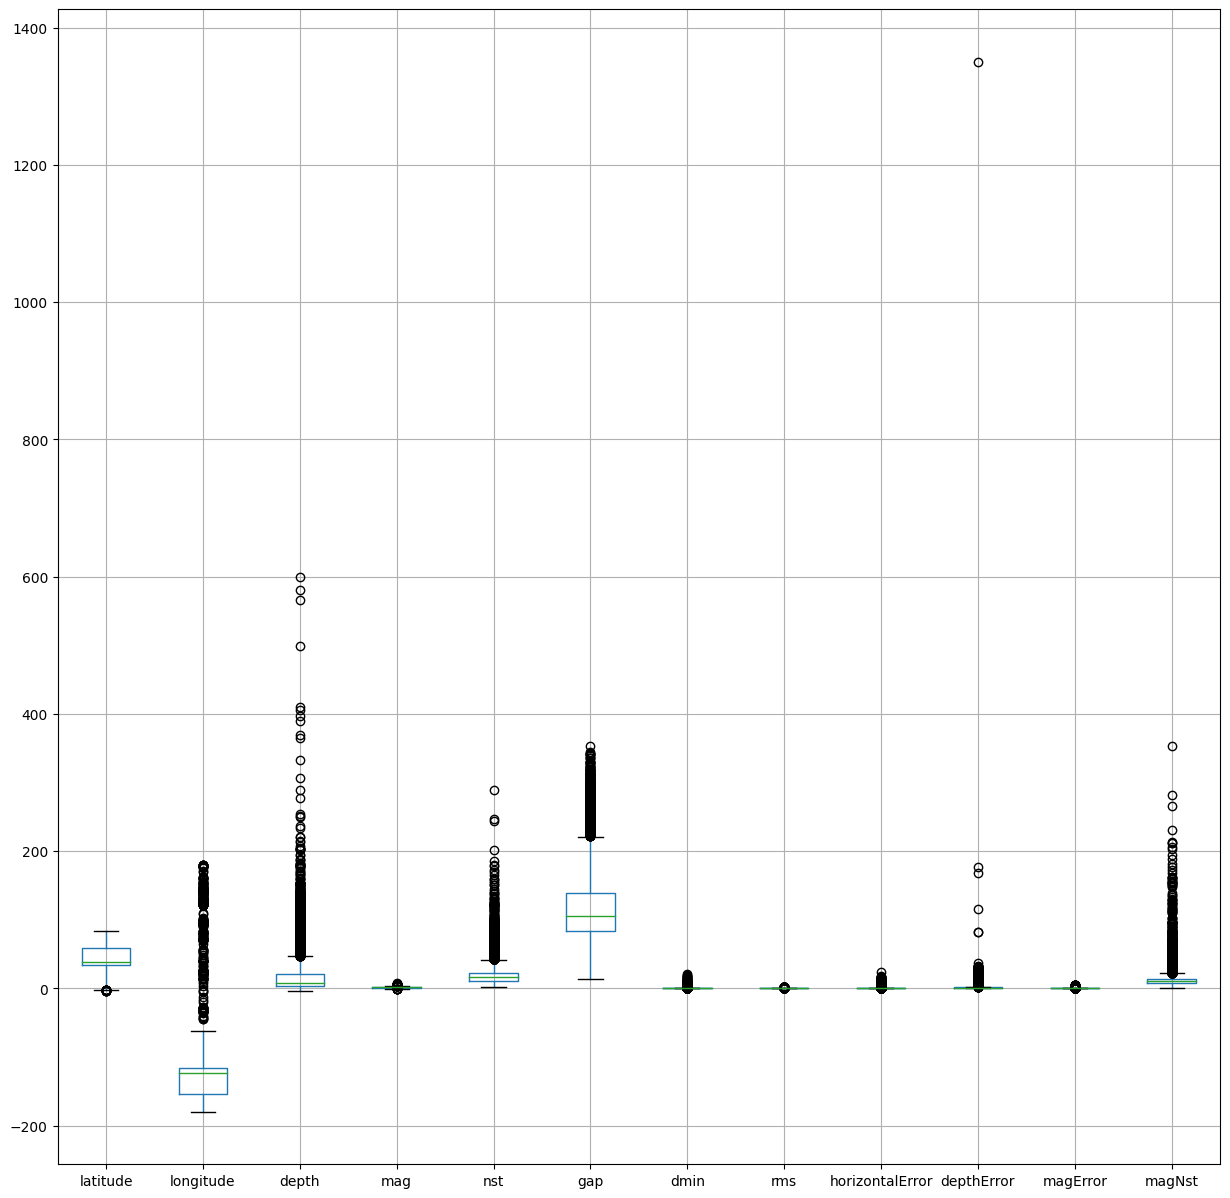

In [343]:
df_new.boxplot(figsize=(15,15))
plt.show()

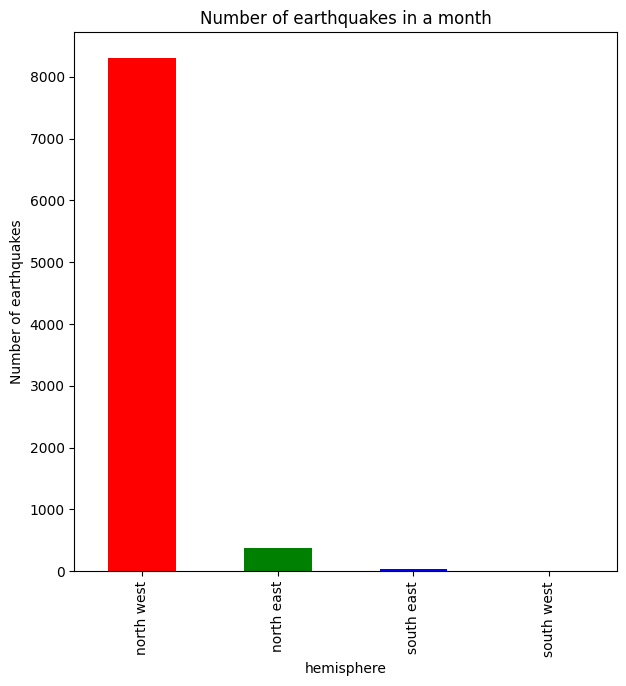

In [344]:
## Post outliers
## Bar chart to compare seismic activities recorded between northern, southern, western and eastern hemisphere
import matplotlib.pyplot as plt


dflt=df_new

dflt.loc[(dflt['longitude'] > 0)&(dflt['latitude'] > 0), 'hemisphere'] = 'north east'
dflt.loc[(dflt['longitude'] <= 0)&(dflt['latitude'] > 0), 'hemisphere'] = 'north west'
dflt.loc[(dflt['longitude'] > 0)&(dflt['latitude'] <= 0), 'hemisphere'] = 'south east'
dflt.loc[(dflt['longitude'] <= 0)&(dflt['latitude'] <= 0), 'hemisphere'] = 'south west'





plt.figure(figsize=(7,7))

dflt['hemisphere'].value_counts().plot(kind='bar', color = ['red', 'green','blue', 'purple'])
plt.xlabel('hemisphere')
plt.ylabel('Number of earthquakes')
plt.title('Number of earthquakes in a month')
plt.show()

In [ ]:
## From the bar chart above
##   We notice that all earthquakes recorded nn the south west hemisphere were deleted.

## In this case, removing outliers is not appropriate as it discards significant earthquakes in terms of magnitude.


## Restore the deleted rows by using the cleaned dataframe df.






In [ ]:
## Final Conclusion:

## The more south east the greater is the magnitude

## The more north west the weaker is the magnitude

## The more north west the greater is the seismic activity

## The more south east/west the lower is the seismic activity


## We can establish that in the regions where there is more seismic activity the magnitudeis weaker.

## Decision making based on seismic activity should be made on a regional basis rather than globally.